## Modelos basados en árbol / Análisis y Predicción de Precios de Autos (Core) - De Elida Peña

## Análisis y Predicción de Precios de Autos (Core)

**Objetivo:** Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

**Dataset:** Automobile Dataset

**Descripción del Dataset:** Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.

**Instrucciones:**

**Parte 1: Análisis Exploratorio de Datos (EDA)**

**1. Carga y Exploración de Datos:**

* Cargar el dataset y revisar la estructura básica.

* Descripción de las variables y su distribución.

* Detección y tratamiento de valores nulos.

* Identificación y tratamiento de outliers.

* Análisis de correlación entre variables.

In [35]:
#Importaciones de la librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# Carga de las informaciondes de Automovile_data
path = '../data/Automobile_data.csv'
df = pd.read_csv(path, sep=',', header=0)
# Visualizar las primeras filas del conjunto de datos
print(df.head())

# Verificar información general
print(df.info())

# Describir las características numéricas
print(df.describe())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

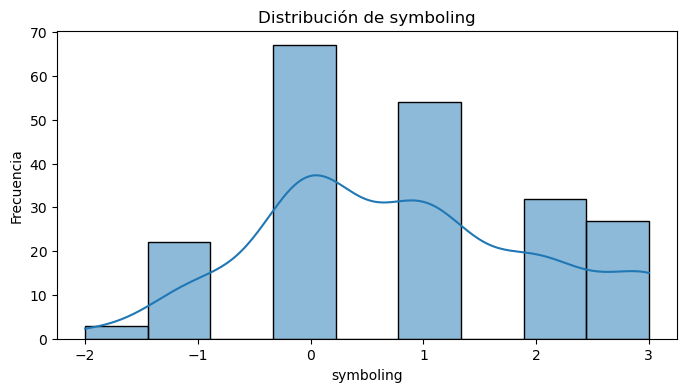

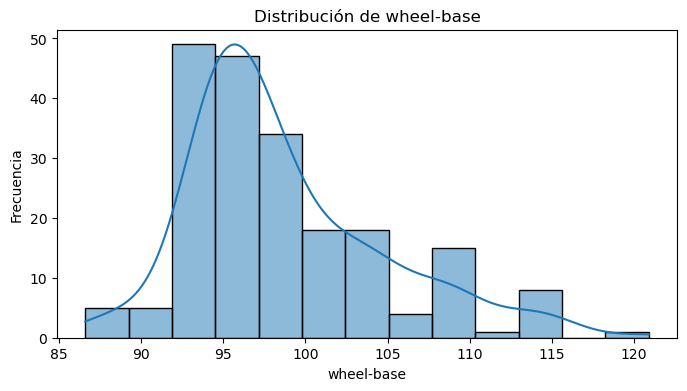

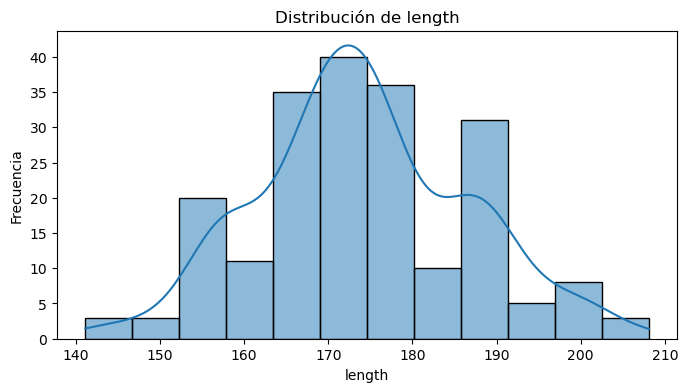

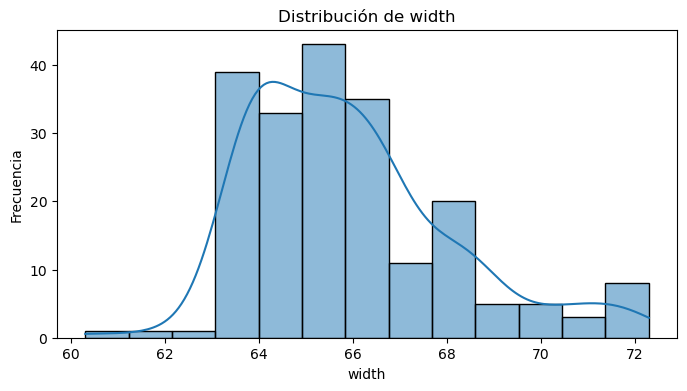

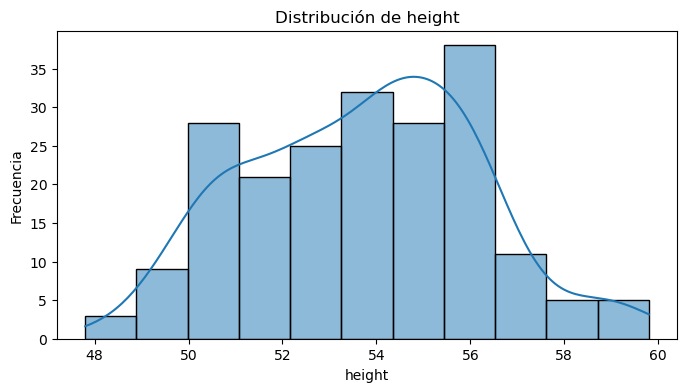

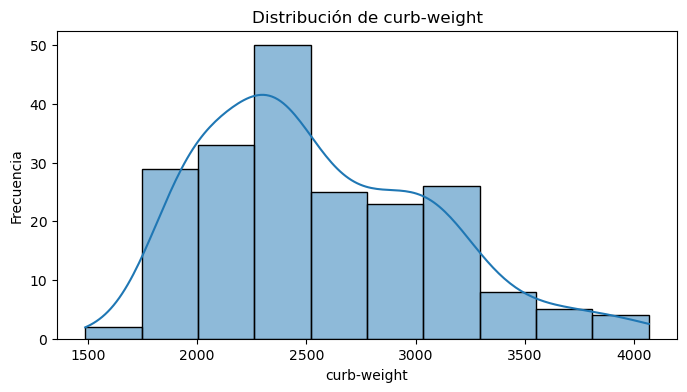

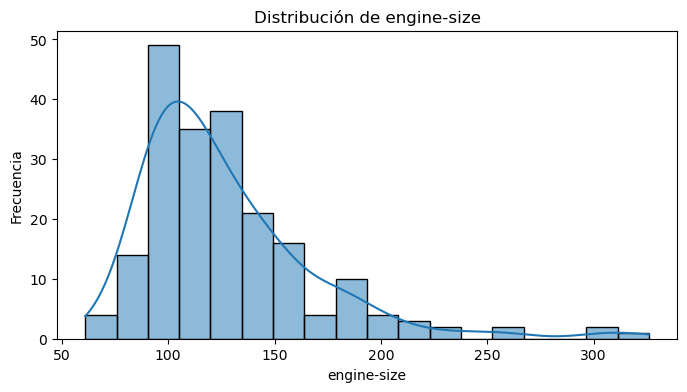

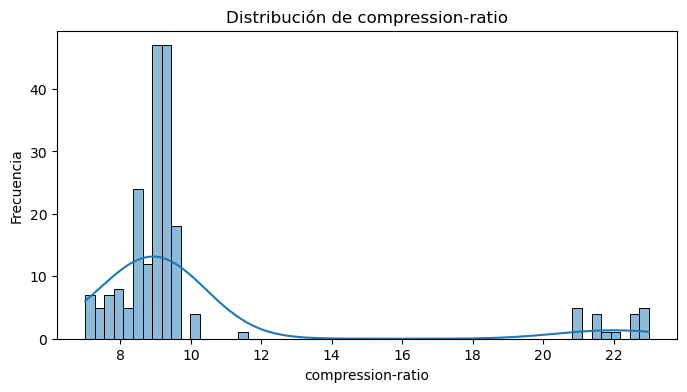

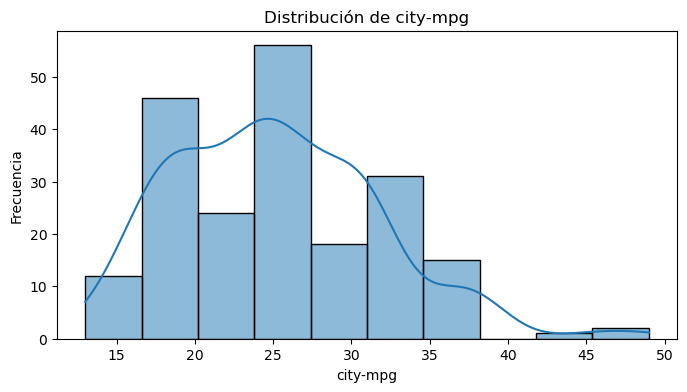

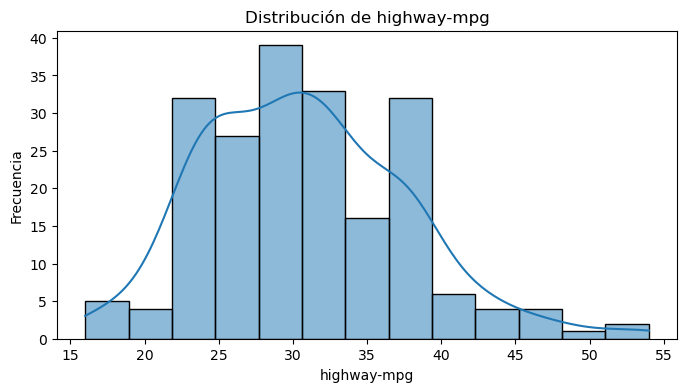

In [ ]:
# Descripción de las variables y su distribución
import seaborn as sns
import matplotlib.pyplot as plt

# Describir estadísticas de las variables numéricas
print(df.describe())

# Visualización de las distribuciones de variables numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


In [5]:
# Detección y tratamiento de valores nulos

In [ ]:
# Verificar valores nulos
print("Valores nulos en cada columna:")
# Verificar cantidad de valores nulos
print(df.isnull().sum())

Valores nulos en cada columna:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


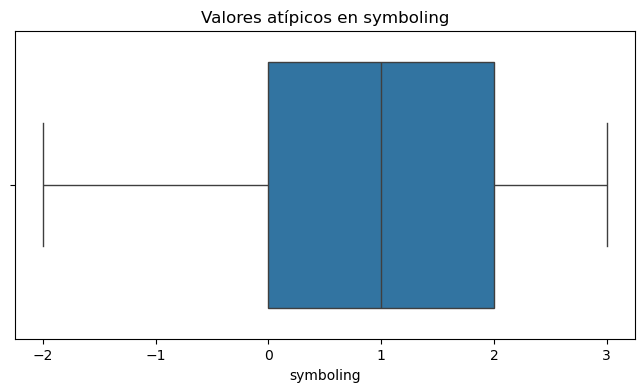

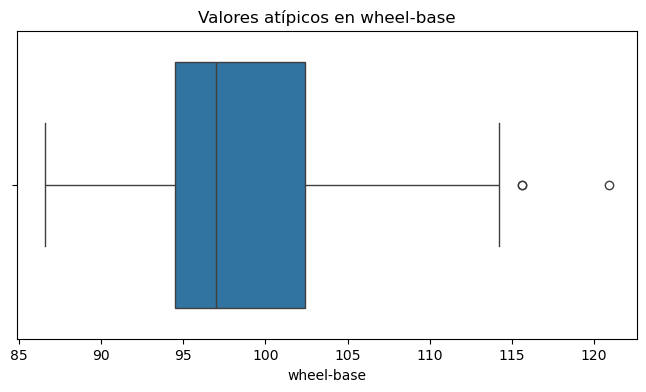

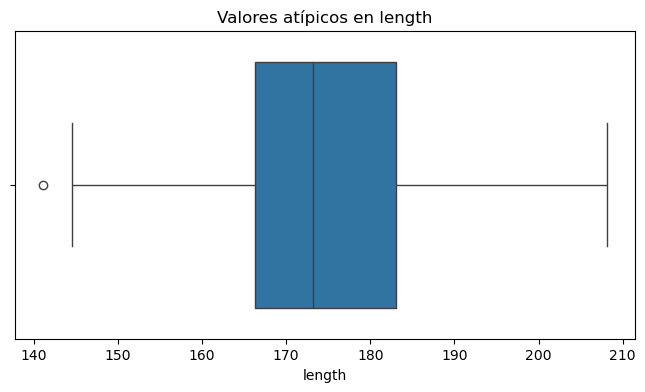

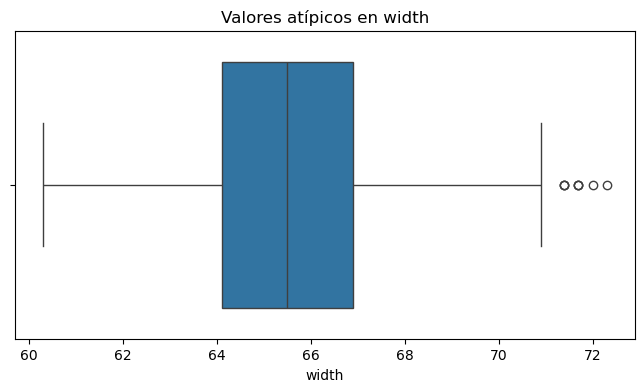

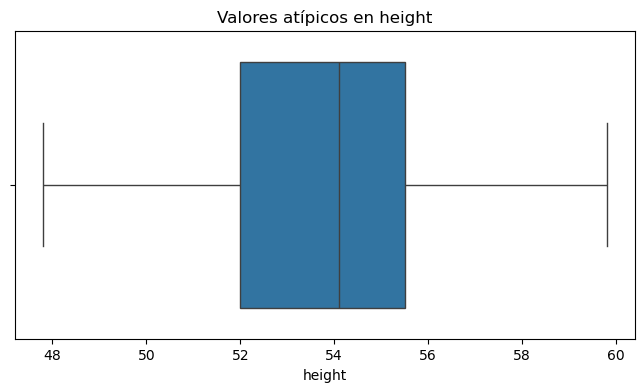

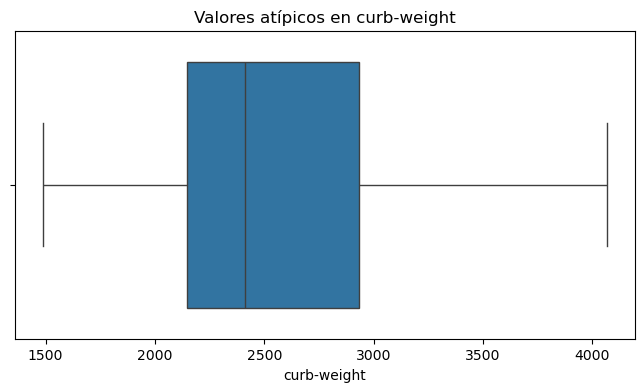

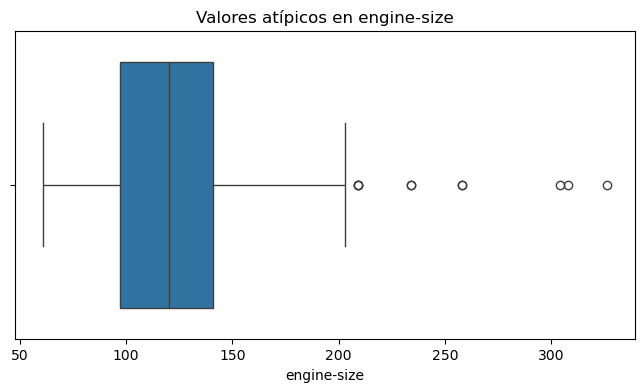

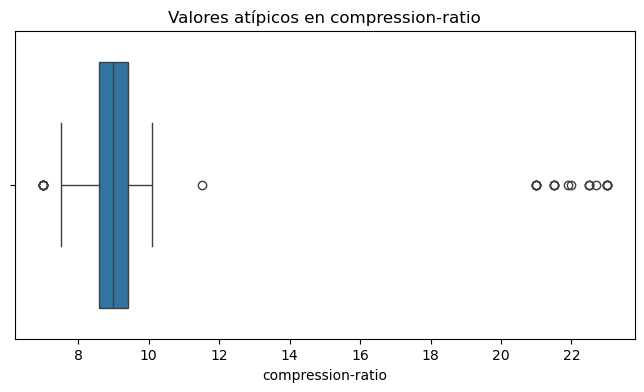

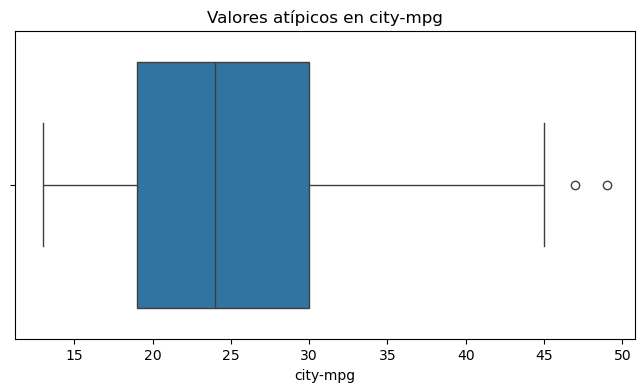

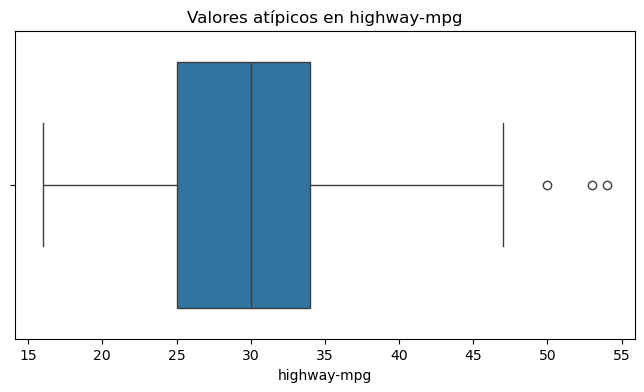

In [10]:
# Identificación y tratamiento de outliers
# Visualización de valores atípicos
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Valores atípicos en {col}')
    plt.xlabel(col)
    plt.show()

# Tratamiento de outliers usando el rango intercuartílico (IQR)
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


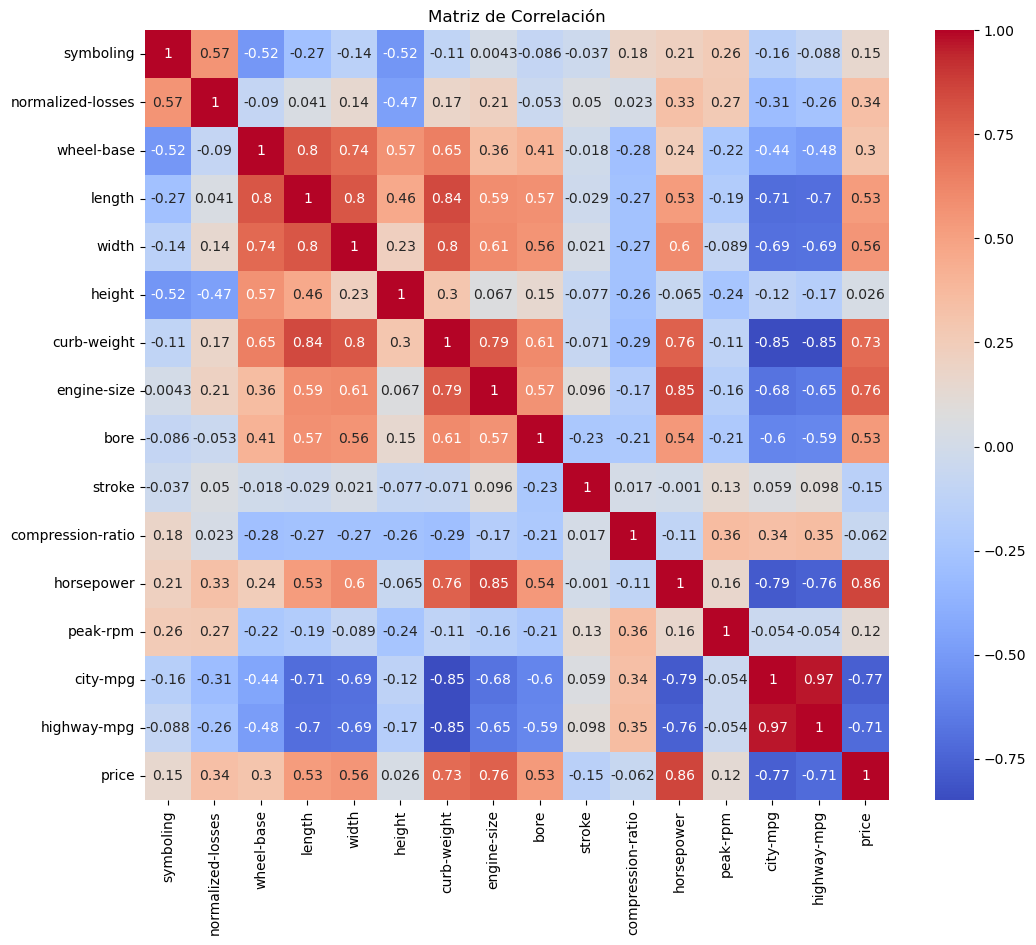

In [ ]:
# Análisis de correlación entre variables.
# seleccion solo culumnas numericas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación con un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



**Parte 2: Preparación de Datos**

**2. Preprocesamiento:**

* Selección de características importantes.

* Transformación de variables categóricas.

* División del conjunto de datos en entrenamiento y prueba.

* Escalado de características.

In [16]:
# Selección de características importantes
# Selección de características basadas en la correlación (ajusta según tus datos)
selected_features = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']  # Cambia según tus resultados
X = df[selected_features]
y = df['price']

In [18]:
# . Transformación de variables 
# Transformar variables categóricas usando One-Hot Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Actualizar X si se han incluido variables categóricas
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [19]:
#  División del conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Escalado de características
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Parte 3: Modelos de Regresión**

**3. Regresión Lineal:**

* Entrenamiento del modelo.

* Evaluación del rendimiento (MSE y R²).

In [24]:
import numpy as np
import pandas as pd

# Combinar X_train y y_train en un DataFrame temporal
train_data = pd.concat([pd.DataFrame(X_train), pd.Series(y_train).reset_index(drop=True)], axis=1)

# Eliminar filas con valores NaN
train_data = train_data.dropna()

# Separar de nuevo X_train y y_train
X_train = train_data.iloc[:, :-1].values  # Todas las columnas excepto la última
y_train = train_data.iloc[:, -1].values   # Última columna

# Repetir para X_test y y_test
test_data = pd.concat([pd.DataFrame(X_test), pd.Series(y_test).reset_index(drop=True)], axis=1)
test_data = test_data.dropna()
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values


In [25]:
from sklearn.impute import SimpleImputer

# Crear un imputador para rellenar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Ajustar e transformar los conjuntos de entrenamiento y prueba
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

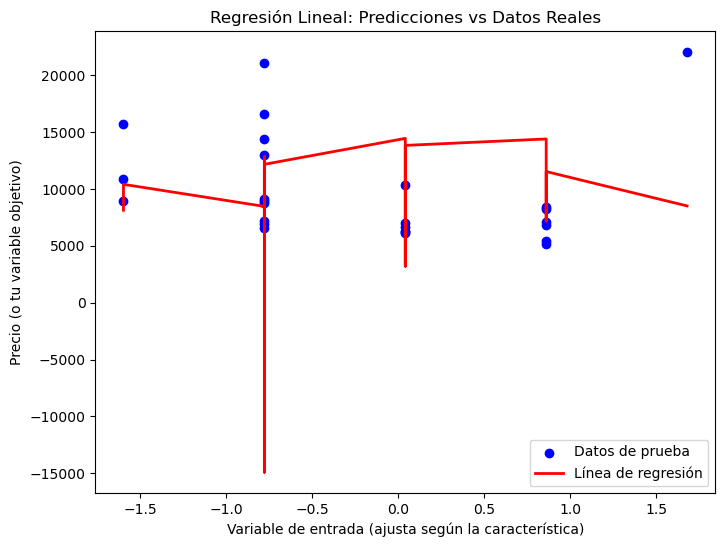

In [27]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
# Modelo de regresión lineal
model = LinearRegression()
# Generar predicciones sobre el conjunto de prueba
y_pred = model_lr.predict(X_test)

# Seleccionar una característica para graficar
feature_index = 0  # Cambia esto para seleccionar una característica diferente si es necesario
X_feature = X_test[:, feature_index]

# Ordenar los valores para una mejor visualización
sorted_indices = np.argsort(X_feature)
X_sorted = X_feature[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(X_feature, y_test, color='blue', label='Datos de prueba')  # Puntos de datos reales
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Línea de regresión')  # Línea de regresión

# Etiquetas y título
plt.xlabel('Variable de entrada (ajusta según la característica)')
plt.ylabel('Precio (o tu variable objetivo)')
plt.title('Regresión Lineal: Predicciones vs Datos Reales')
plt.legend()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Crear el modelo KNN
model_knn = KNeighborsRegressor(n_neighbors=5)

# Entrenar el modelo
model_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [32]:
#Evaluacion de rendimiento

# Predicciones
y_pred_knn = model_knn.predict(X_test)

# Calcular métricas
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'KNN - MSE: {mse_knn}, R²: {r2_knn}')

KNN - MSE: 17848935.069230773, R²: 0.13611745292672395


**4. K-Nearest Neighbors (KNN):**

* Entrenamiento del modelo.

* Evaluación del rendimiento (MSE y R²).

In [36]:
# Modelo 2: K-Nearest Neighbors (KNN)
model_knn = KNeighborsRegressor(n_neighbors=5)  # Ajusta el valor de n_neighbors según sea necesario
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

**5. Árbol de Decisión:**

* Entrenamiento del modelo.

* Evaluación del rendimiento (MSE y R²).

In [37]:
# Modelo 3: Árbol de Decisión
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

**Parte 4: Benchmarking y Comparación de Modelos**

**6. Comparación de Modelos:**

* Comparar los resultados de los tres modelos en términos de MSE y R².

* Discusión sobre las diferencias en el rendimiento de los modelos.


In [38]:
# Comparación de Modelos
print("Comparación de Modelos:")
print(f'Regresión Lineal - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}')
print(f'KNN - MSE: {mse_knn:.2f}, R²: {r2_knn:.2f}')
print(f'Árbol de Decisión - MSE: {mse_tree:.2f}, R²: {r2_tree:.2f}')

Comparación de Modelos:
Regresión Lineal - MSE: 56996694.85, R²: -1.76
KNN - MSE: 17848935.07, R²: 0.14
Árbol de Decisión - MSE: 31829415.31, R²: -0.54


**Conclusión**

**7. Interpretación de Resultados:**

* Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.

* Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

In [ ]:
# Interpretación de Resultados
print("\nInterpretación de Resultados:")
print("El modelo con el MSE más bajo y el R² más alto será el más adecuado para predecir precios de autos.")
if mse_lr < mse_knn and mse_lr < mse_tree:
    print("El modelo de Regresión Lineal es el más adecuado según el MSE.")
elif mse_knn < mse_lr and mse_knn < mse_tree:
    print("El modelo de KNN es el más adecuado según el MSE.")
else:
    print("El modelo de Árbol de Decisión es el más adecuado según el MSE.")

print("Considera el equilibrio entre MSE y R². Si el modelo tiene un R² cercano a 1, significa que explica bien la varianza de los datos.")
#posibles mejoras : Ajustar hiperparametros



Interpretación de Resultados:
El modelo con el MSE más bajo y el R² más alto será el más adecuado para predecir precios de autos.
El modelo de KNN es el más adecuado según el MSE.
Considera el equilibrio entre MSE y R². Si el modelo tiene un R² cercano a 1, significa que explica bien la varianza de los datos.


**Tareas Adicionales y Desafíos**

**8. Desafíos Adicionales:**

* Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.

* Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.

* Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.

In [40]:
# Optimización de Hiperparámetros con GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimización de KNN con GridSearchCV
param_grid_knn = {'n_neighbors': np.arange(1, 21)}
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)
print(f'Mejor valor de n_neighbors para KNN: {grid_search_knn.best_params_}')
print(f'MSE óptimo para KNN: {abs(grid_search_knn.best_score_):.2f}')


Mejor valor de n_neighbors para KNN: {'n_neighbors': 20}
MSE óptimo para KNN: 25105779.36


In [41]:
# Feature Engineering
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train, y_train)
print(f'Mejores hiperparámetros para Árbol de Decisión: {grid_search_tree.best_params_}')
print(f'MSE óptimo para Árbol de Decisión: {abs(grid_search_tree.best_score_):.2f}')


Mejores hiperparámetros para Árbol de Decisión: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
MSE óptimo para Árbol de Decisión: 33252686.64
